# Pandas Built-in Data Visualization

Here, we will learn about pandas built-in capabilities for data visualization! It's built-off of matplotlib, but it baked into pandas for easier usage!  

Pandas makes plotting quite easy by automating much of the procedure for you. All pandas plotting is handled internally by matplotlib and is publicly accessed through the DataFrame or Series plot method. We say that the pandas plot method is a wrapper around matplotlib. When you create a plot in pandas, you will be returned a matplotlib Axes or Figure. You can use the full power of matplotlib to modify this object until you get the desired result. 

Pandas is only able to produce a small subset of the plots available with matplotlib, such as line, bar, box, and scatter plots, along with kernel density estimates (KDEs) and histograms. Pandas excels at the plots it does create by making the process very easy and efficient, usually taking just a single line of code, saving lots of time when exploring data.

## Getting Ready

One of the keys to understanding plotting in pandas is to know whether the plotting method requires one or two variables to make the plot. For instance, line and scatter plots require two variables to plot each point. The same holds true for bar plots, which require some x-coordinates to locate the bar and another variable for the height of the bar. Boxplots, histograms, and KDEs use only a single variable to make their plots. 

The two-variable line and scatter plots, by default, use the index as the x axis and the values of the columns as the y axis. The one-variable plots ignore the index and apply a transformation or aggregation to each variable to make their plots


Let's take a look!

## Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

## Plotting with Pandas

In [2]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'], 
                  data={'Apples':[20, 10, 40, 20, 50],
                        'Oranges':[35, 40, 25, 19, 33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


#### Bar Plot
**Bar plots** use the index of the labels for the x axis and the column values as the bar heights. Use the plot method with the kind parameter set to bar:

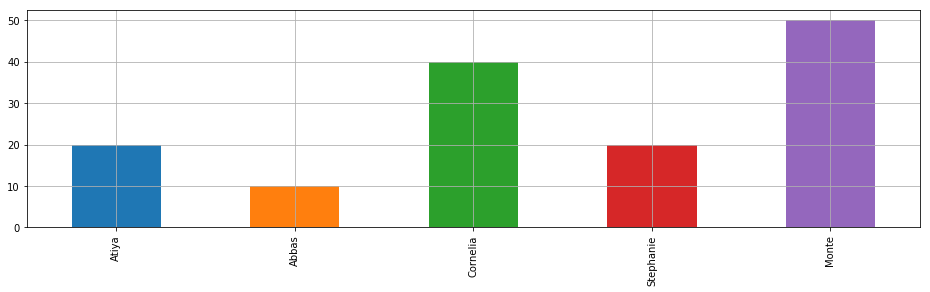

In [11]:
# color = ['.2', '.7']
df['Apples'].plot(kind='bar', grid=True,figsize=(16,4))

Let's plot all two-variable plots together in a single Figure. The scatter plot is the4. only one that requires you to specify columns for the x and y values. If you wish to use the index for a scatter plot, you will have to use the reset_index method to make it a column. The other two plots use the index for the x axis and make a new set of lines/bars for every single numeric column:

In [7]:
import matplotlib.pyplot as plt

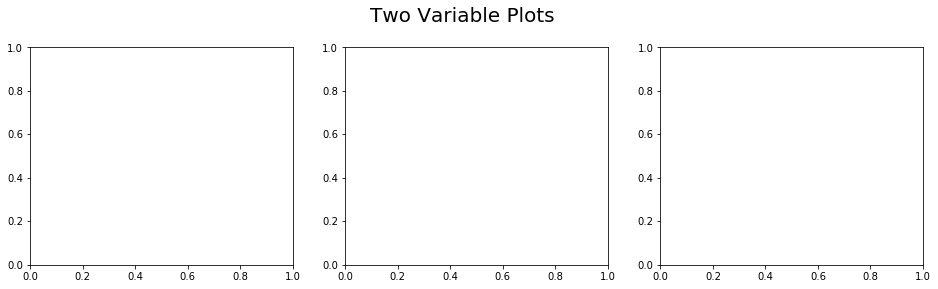

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot(kind='line', color=color, ax=ax1, title='Line plot')
df.plot(x='Apples', y='Oranges', kind='scatter', color=color, 
        ax=ax2, title='Scatterplot')
df.plot(kind='bar', color=color, ax=ax3, title='Bar plot')

#### KDE plot
A KDE plot ignores the index and uses the values of each column as the x axis and calculates a probability density for the y values.

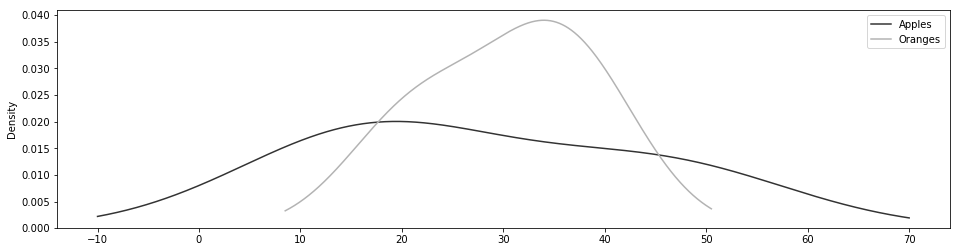

In [7]:
df.plot(kind='kde', color=color, figsize=(16,4))

Let's put all the one-variable plots in the same Figure as well:

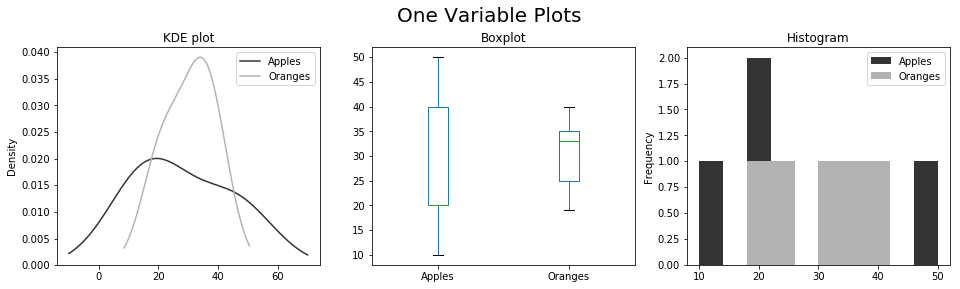

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot(kind='kde', color=color, ax=ax1, title='KDE plot')
df.plot(kind='box', ax=ax2, title='Boxplot')
df.plot(kind='hist', color=color, ax=ax3, title='Histogram')

#### <span style="color:red">Note</span>

 By default, pandas will use each numeric column of the DataFrame to make a new set of bars, lines, KDEs, boxplots, or histograms and use the index as the x values when it is a two-variable plot. One of the exceptions is the scatter plot, which must be explicitly given a single column for the x and y values. 
 
The pandas plot method is very versatile and has a large number of parameters that allow you to customize the result to your liking.

### Theres more:

With the exception of the scatter plot, all the plots did not specify the columns to be used. Pandas defaulted to using every single numeric column, as well as the index in the case of two-variable plots. You can, of course, specify the exact columns that you would like to use for each x or y value:

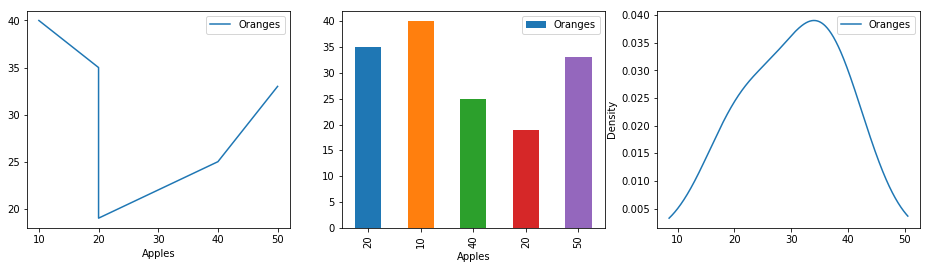

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
df.sort_values('Apples').plot(x='Apples', y='Oranges', kind='line', ax=ax1)
df.plot(x='Apples', y='Oranges', kind='bar', ax=ax2)
df.plot(x='Apples', kind='kde', ax=ax3)

## Additional stuff (Important too!!)

### The Data

There are some fake data csv files you can read in as dataframes:

In [12]:
df1 = pd.read_csv('data/df1',index_col=0)
df2 = pd.read_csv('data/df2')

In [14]:
df2

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008
5,0.286043,0.593465,0.907307,0.637898
6,0.430436,0.166230,0.469383,0.497701
7,0.312296,0.502823,0.806609,0.850519
8,0.187765,0.997075,0.895955,0.530390
9,0.908162,0.232726,0.414138,0.432007


## Style Sheets

Matplotlib has [style sheets](http://matplotlib.org/gallery.html#style_sheets) you can use to make your plots look a little nicer. These style sheets include plot_bmh,plot_fivethirtyeight,plot_ggplot and more. They basically create a set of style rules that your plots follow. I recommend using them, they make all your plots have the same look and feel more professional. You can even create your own if you want your company's plots to all have the same look (it is a bit tedious to create on though).

Here is how to use them.

**Before plt.style.use() your plots look like this:**

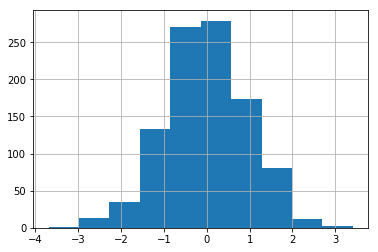

In [15]:
df1['A'].hist()

Call the style:

In [26]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Now your plots look like this:

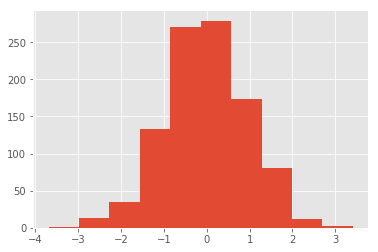

In [17]:
df1['A'].hist()

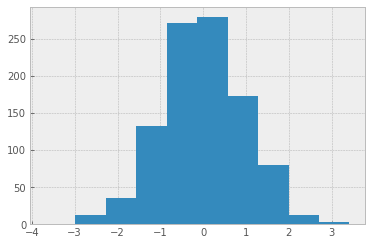

In [18]:
plt.style.use('bmh')
df1['A'].hist()

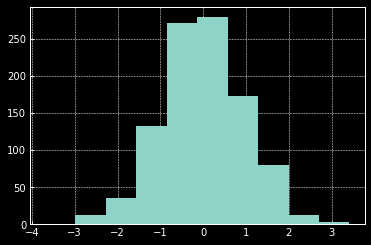

In [19]:
plt.style.use('dark_background')
df1['A'].hist()

In [20]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


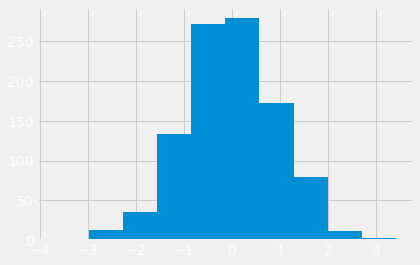

In [22]:
plt.style.use('fivethirtyeight')
df1['A'].hist()

In [77]:
plt.style.use('ggplot')

Let's stick with the ggplot style and actually show you how to utilize pandas built-in plotting capabilities!

# Plot Types

There are several plot types built-in to pandas, most of them statistical plots by nature:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

#### <span style="color:red">Note</span>
You can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc..)

Let's start going through them!

## Area

In [28]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


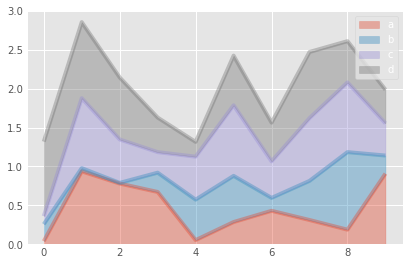

In [27]:
df2.plot.area(alpha=0.4);

## Barplots

In [79]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


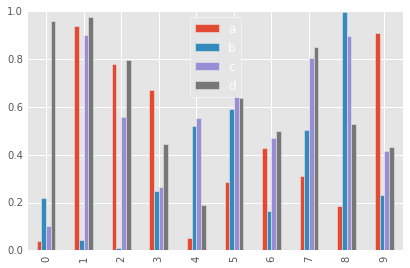

In [80]:
df2.plot.bar()

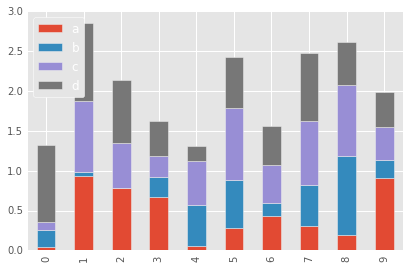

In [81]:
df2.plot.bar(stacked=True)

## Histograms

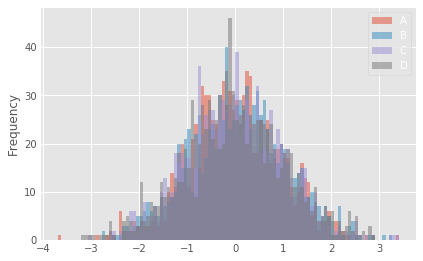

In [33]:
df1.plot.hist(bins=100, alpha=0.5)

## Line Plots

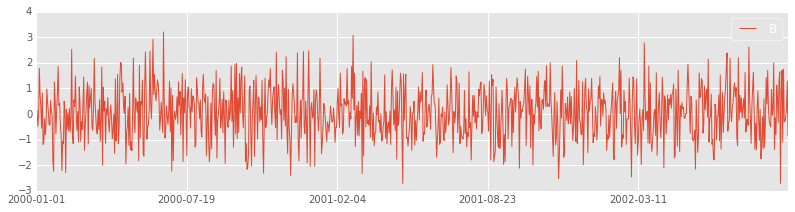

In [83]:
df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1)

## Scatter Plots

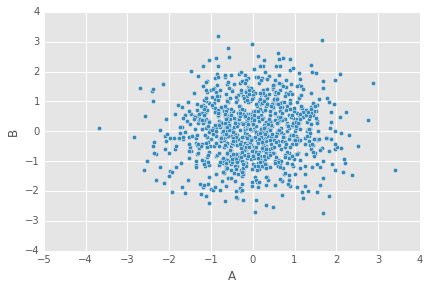

In [84]:
df1.plot.scatter(x='A',y='B')

You can use c to color based off another column value
Use cmap to indicate colormap to use. 
For all the colormaps, check out: http://matplotlib.org/users/colormaps.html

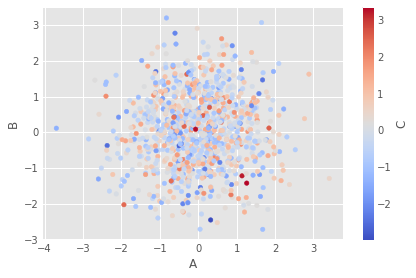

In [35]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

Or use s to indicate size based off another column. s parameter needs to be an array, not just the name of a column:

C:\Users\asank\Anaconda3\lib\site-packages\matplotlib\collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


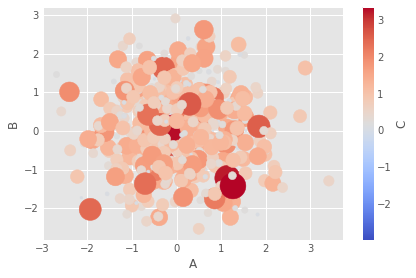

In [36]:
df1.plot.scatter(x='A',y='B',s=df1['C']*200,c='C',cmap='coolwarm')

## BoxPlots

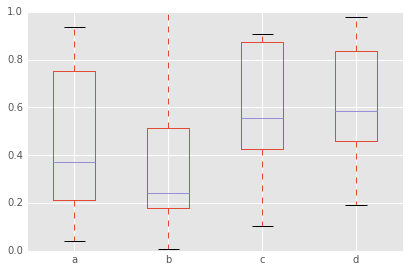

In [87]:
df2.plot.box() # Can also pass a by= argument for groupby

## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot:

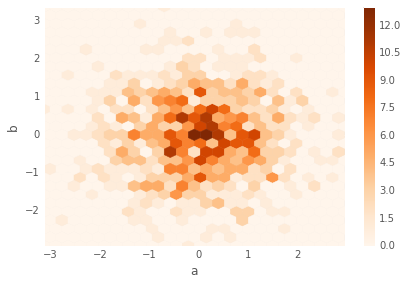

In [88]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

## Kernel Density Estimation plot (KDE)

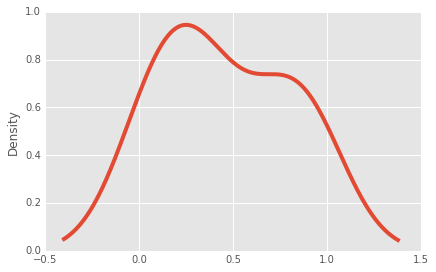

In [89]:
df2['a'].plot.kde()

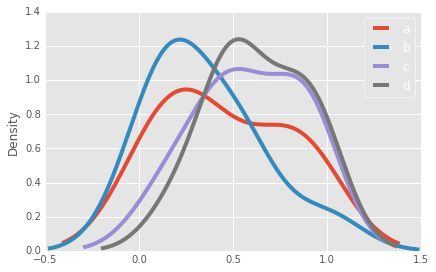

In [90]:
df2.plot.density()

That's it! Hopefully you can see why this method of plotting will be a lot easier to use than full-on matplotlib, it balances ease of use with control over the figure. A lot of the plot calls also accept additional arguments of their parent matplotlib plt. call. 

## References
* http://pandas.pydata.org/pandas-docs/stable/visualization.html - Pandas visualization doc (highly recommended)
